In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle
import numpy as np


In [2]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.25)

model.save('CNN.model')

Train on 9265 samples, validate on 3089 samples
Epoch 1/5
9265/9265 [==============================] - 1197s 129ms/sample - loss: 1.3127 - accuracy: 0.5349 - val_loss: 0.5534 - val_accuracy: 0.8184
Epoch 2/5
9265/9265 [==============================] - 1227s 132ms/sample - loss: 0.3740 - accuracy: 0.8800 - val_loss: 0.3693 - val_accuracy: 0.8741
Epoch 3/5
9265/9265 [==============================] - 1232s 133ms/sample - loss: 0.2019 - accuracy: 0.9361 - val_loss: 0.2839 - val_accuracy: 0.9090
Epoch 4/5
9265/9265 [==============================] - 1234s 133ms/sample - loss: 0.1312 - accuracy: 0.9601 - val_loss: 0.2863 - val_accuracy: 0.9162
Epoch 5/5
9265/9265 [==============================] - 1239s 134ms/sample - loss: 0.0867 - accuracy: 0.9701 - val_loss: 0.2680 - val_accuracy: 0.9307
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN.model/assets


In [3]:
model.save('CNN3.model')

INFO:tensorflow:Assets written to: CNN3.model/assets


In [38]:
model.save_weights('my_model_weights.h5')


In [4]:
import cv2
import tensorflow as tf

CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array=img_array/255.0  # filepathread in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE,1)  

In [17]:
model = tf.keras.models.load_model("CNN.model")
for i in range(1,1231):
    prediction = model.predict([prepare("/home/paa/Newdataset/0/"+str(i)+".jpeg")])
    #print(prediction)
    prediction=np.argmax(prediction)
    if(prediction!=0):
        print(prediction)


4
8
8
8
8
9
1
9


(275, 183)


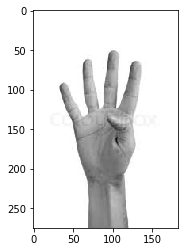

8


In [37]:
import matplotlib.pyplot as plt
import cv2
prediction = model.predict([prepare("/home/paa/1.jpeg")])
img=cv2.imread("/home/paa/1.jpeg",cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img,cmap="gray")
plt.show()
i=np.argmax(prediction)
print(i)

In [39]:
model.load_weights('my_model_weights.h5', by_name=True)

In [40]:
model.fit(X, y, batch_size=32, epochs=1, validation_split=0.25)

Train on 9265 samples, validate on 3089 samples
9265/9265 [==============================] - 2116s 228ms/sample - loss: 0.0724 - accuracy: 0.9788 - val_loss: 0.2739 - val_accuracy: 0.9288


In [41]:
model.save('CNN3.model')
model.save_weights('my_model_weights.h5')

INFO:tensorflow:Assets written to: CNN3.model/assets


In [3]:
model = tf.keras.models.load_model("CNN3.model")
model.load_weights('my_model_weights.h5', by_name=True)

In [4]:
model.fit(X, y, batch_size=32, epochs=14, validation_split=0.25)
model.save('CNN20.model')
model.save_weights('my_model_weights.h5')

NameError: name 'X' is not defined